# Import Libraries

In [1]:
import numpy as np
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import torch
from matplotlib import pyplot as plt
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
%matplotlib inline

In [2]:
path_to_train_data = "Hand Gestures dataset/train"
train_dirs = []
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        train_dirs.append(entry.path)
        
print(train_dirs)

['Hand Gestures dataset/train\\0', 'Hand Gestures dataset/train\\1', 'Hand Gestures dataset/train\\10', 'Hand Gestures dataset/train\\11', 'Hand Gestures dataset/train\\12', 'Hand Gestures dataset/train\\13', 'Hand Gestures dataset/train\\14', 'Hand Gestures dataset/train\\15', 'Hand Gestures dataset/train\\16', 'Hand Gestures dataset/train\\17', 'Hand Gestures dataset/train\\18', 'Hand Gestures dataset/train\\19', 'Hand Gestures dataset/train\\2', 'Hand Gestures dataset/train\\3', 'Hand Gestures dataset/train\\4', 'Hand Gestures dataset/train\\5', 'Hand Gestures dataset/train\\6', 'Hand Gestures dataset/train\\7', 'Hand Gestures dataset/train\\8', 'Hand Gestures dataset/train\\9']


In [3]:
X = []
y = []
d = range(20)
for train_dir in train_dirs:
    train = train_dir.split('\\')[-1]
    for training_image in os.scandir(train_dir):
        img1 = cv2.imread(training_image.path)
        X.append(img1)
        y.append(d[int(train)])

y = np.array(y)          
X = np.array(X).astype(float)


In [4]:
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state = 99)


(18000, 50, 50, 3)
(18000,)


In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14400, 50, 50, 3)
(3600, 50, 50, 3)
(14400,)
(3600,)


# Another Way

In [6]:
train_dir = "Hand Gestures dataset/train"
test_dir = "Hand Gestures dataset/test"
classes = os.listdir(train_dir)

In [7]:
train_transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(40),              # resize shortest side
        transforms.CenterCrop(40),          # crop longest side
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [8]:
trainset = ImageFolder(train_dir, transform=train_transform)
testset = ImageFolder(test_dir, transform=train_transform)
print(len(trainset))

18000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  0 (0)


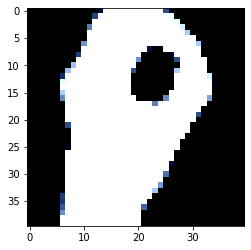

In [9]:
def show_image(img,label):
    print('Label: ', trainset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

show_image(*trainset[15])

In [10]:
torch.manual_seed(10)
val_size=len(trainset)//5
train_size=len(trainset) - val_size
train_ds, val_ds = random_split(trainset, [train_size, val_size])
test_ds = testset
len(train_ds), len(val_ds), len(test_ds) 

(14400, 3600, 6000)

In [11]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


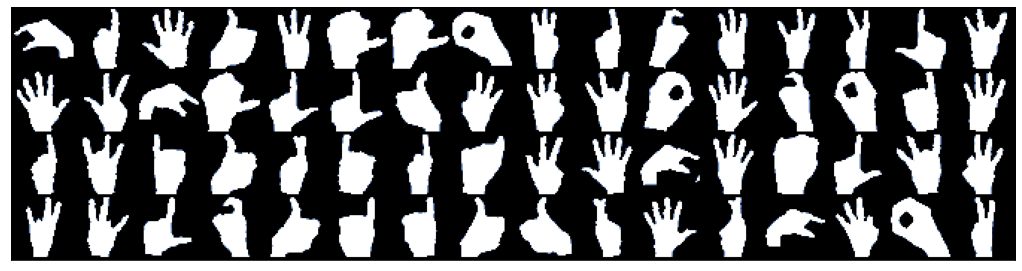

In [12]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break